In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sample_rate = 48000  # samples per second
n_samples = 2*sample_rate  # 2 seconds
time = np.arange(n_samples) / sample_rate

# Signal
amplitude = np.zeros(n_samples)
amplitude[48000:] = 1.

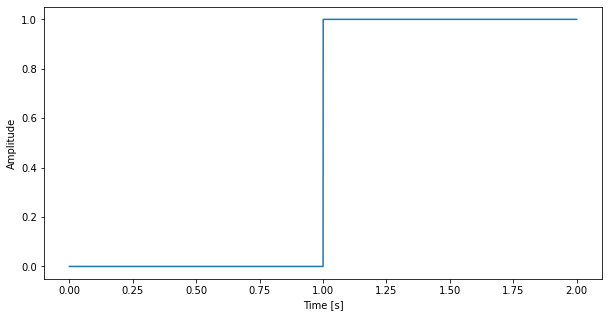

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(time, amplitude)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [26]:
from scipy.fft import fft, ifft, fftfreq, fftshift

In [34]:
yf = fft(amplitude)
xf = fftfreq(n_samples, 1/sample_rate)

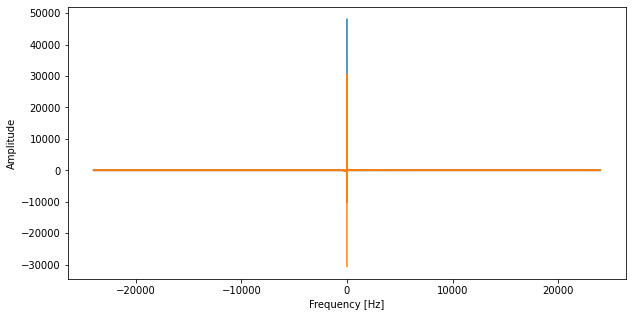

In [39]:
plt.figure(figsize=(10, 5))
# plt.plot(xf, yf.real)
# plt.plot(xf, yf.imag)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

In [46]:
# list(yf)

In [54]:
yf[yf.real>0.01]  # big real peak at f=0

array([48000.-0.j])

In [64]:
yf[yf.imag>1000]  # big phase shift for f=0

array([-1.+30557.74906274j, -1.+10185.91632516j, -1. +6111.54976019j,
       -1. +4365.39264845j, -1. +3395.30535445j, -1. +2777.97706852j,
       -1. +2350.59594078j, -1. +2037.18310795j, -1. +1797.51446595j,
       -1. +1608.30237557j, -1. +1455.13067919j, -1. +1328.59753492j,
       -1. +1222.30969024j, -1. +1131.76818968j, -1. +1053.71516896j])

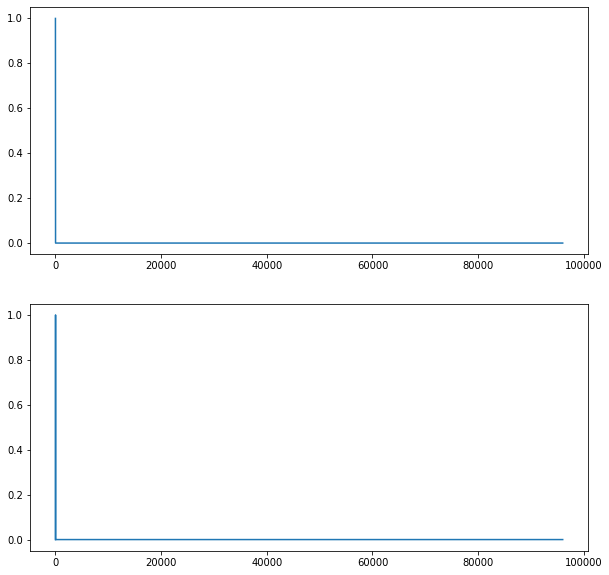

In [71]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(np.arange(yf.shape[0]), yf.real>0.01)
axs[1].plot(np.arange(yf.shape[0]),yf.imag>1000)

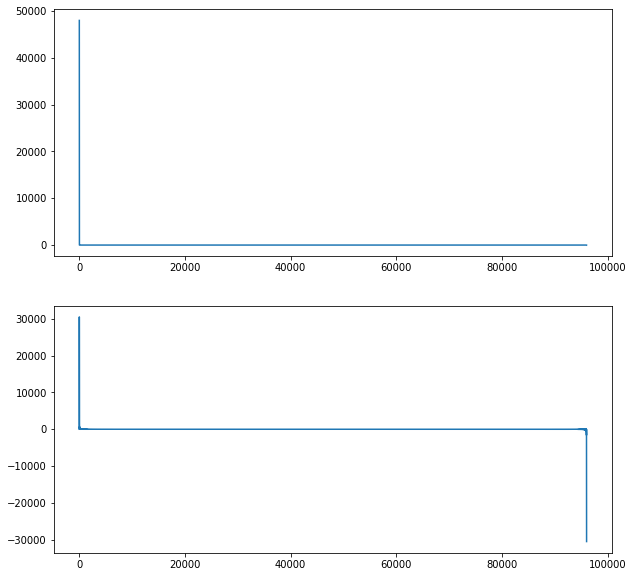

In [72]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(np.arange(yf.shape[0]), yf.real)
axs[1].plot(np.arange(yf.shape[0]),yf.imag)